In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

data = pd.read_csv("C:/program1/class/iris.csv")
df = pd.DataFrame(data)

index = ['sepal length', 'sepal width', 'petal length', 'petal width', 'species']
df.columns = index

df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [41]:
# 데이터 확인
df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [42]:
# 라벨 인코딩 함수
from sklearn.preprocessing import LabelEncoder 

# 라벨 인코딩을 수행합니다.
label_encoder = LabelEncoder()
def label_encode(data, column):
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])
    return data

# 데이터(data)와 인코딩할 열(column)을 전달하여 label encoding 수행
df = label_encode(df, 'species')

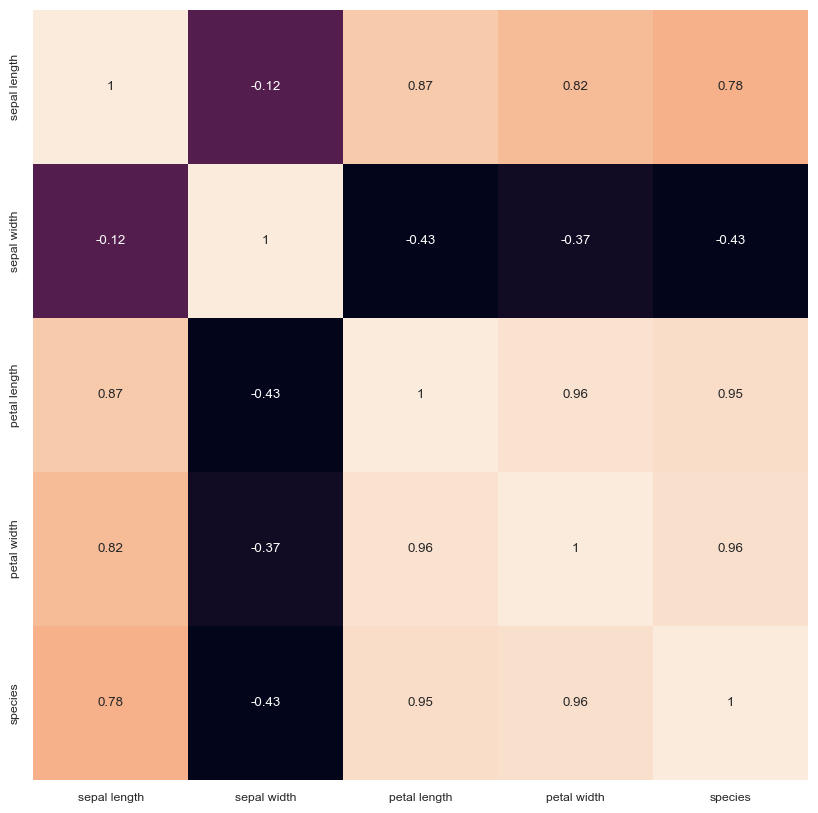

In [43]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음
#import matplotlib.pyplot as plt
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# Species와 높은건 'petal length', 'petal width'

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [46]:
X = df.drop('sepal length',axis=1)
X.head()

,sepal width,petal length,petal width,species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0


In [47]:
y = df['sepal length']
y.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal length, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 

# 라벨 인코딩을 수행합니다.
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 데이터를 훈련 세트와 테스트 세트로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, shuffle=True, random_state=12)

# 선형 회귀 모델을 초기화하고 훈련 데이터에 대해 피팅합니다.
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측을 수행합니다.
ly_preds = model.predict(X_test)

# 평균 제곱근 오차를 계산하고 출력합니다.
print('평균제곱근오차:', mean_squared_error(ly_preds, y_test))


평균제곱근오차: 11.507565675153597


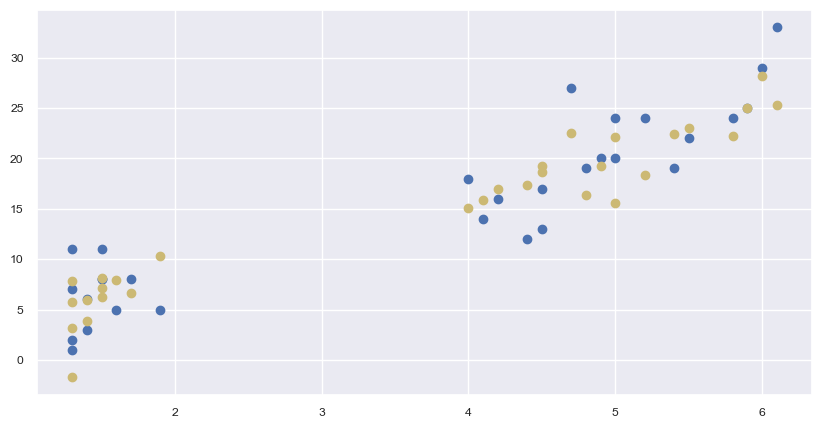

In [50]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(X_test['petal length'], y_test, label='y_test')
plt.scatter(X_test['petal length'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()    
# 상관 관계가 높았던 petal length로 진행

In [51]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 18.441666666666666


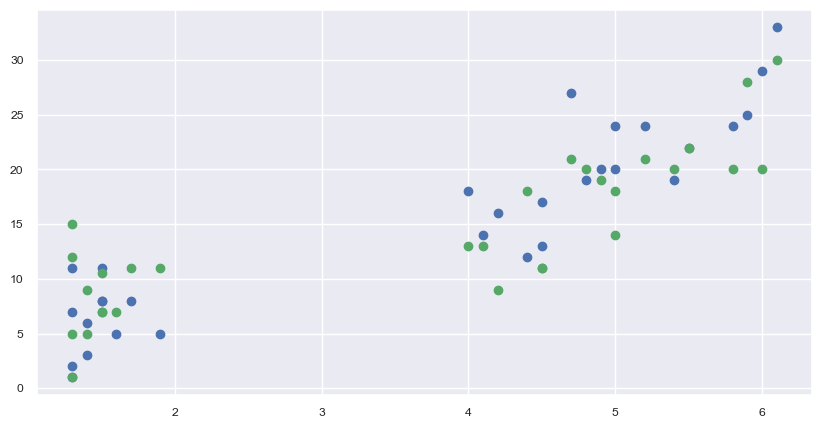

In [52]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['petal length'], y_test, label='y_test')
plt.scatter(X_test['petal length'], dy_preds, c='g', label='dy_preds')
plt.show() 

In [53]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 10.249096630347697


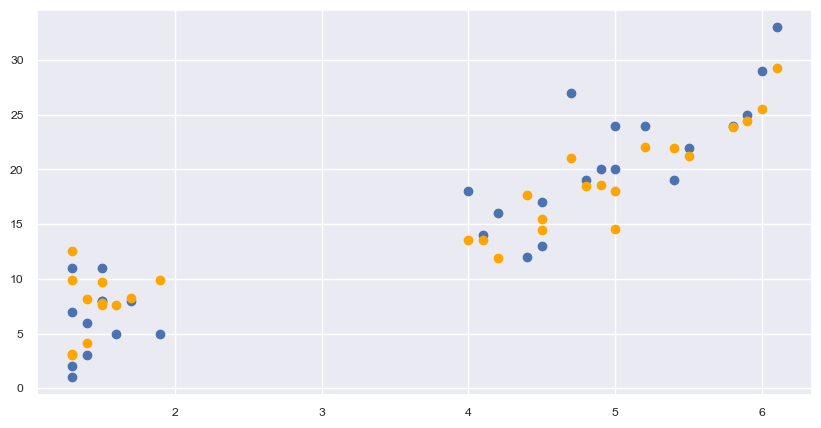

In [54]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['petal length'], y_test, label='y_test')
plt.scatter(X_test['petal length'], ry_preds, c='orange', label='ry_preds')

plt.show()   

In [55]:
#SVR
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 10.622115969588878


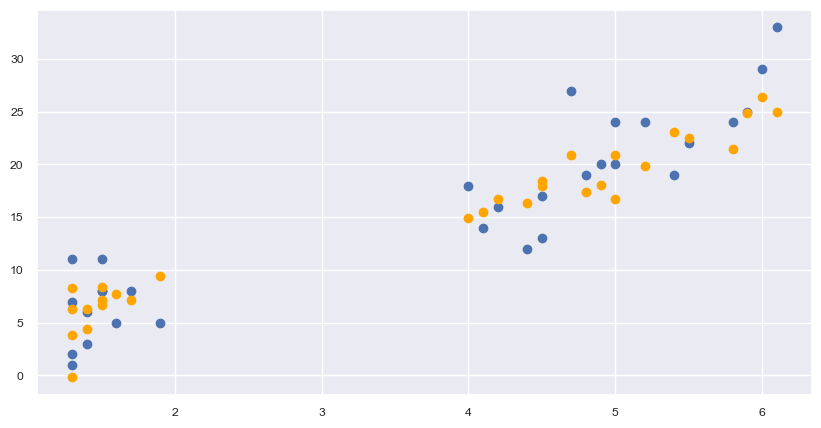

In [56]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['petal length'], y_test, label='y_test')
plt.scatter(X_test['petal length'], ry_preds, c='orange', label='ry_preds')

plt.show()    

In [57]:
#KNN 알고리즘
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=10)# 이웃의 개수 10개로 설정

#모델 훈련
knn_model.fit(X_train, y_train)
# 테스트 데이터에 대한 예측값 계산
knn_preds = knn_model.predict(X_test)

# MSE 계산
knn_mse = mean_squared_error(y_test, knn_preds)
print('KNN 모델의 평균제곱근오차:', knn_mse)

KNN 모델의 평균제곱근오차: 11.151666666666667


C:\Users\User\.anaconda\envs\deep\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\.anaconda\envs\deep\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\.anaconda\envs\deep\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\.anaconda\envs\deep\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\.anaconda\envs\deep\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from current font.
  fig.canvas.print_figu

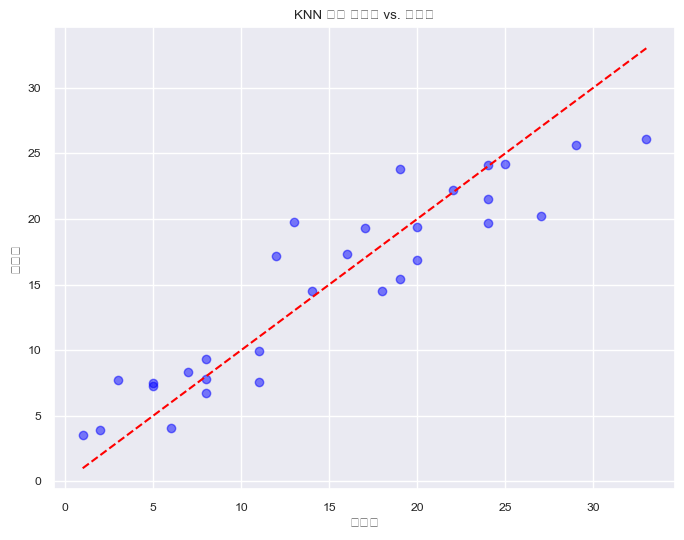

In [58]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, knn_preds, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('KNN 모델 예측값 vs. 실제값')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.show()